https://towardsdatascience.com/plotting-live-data-with-matplotlib-d871fac7500b

# VERSION SLIDE WINDOW

In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from collections import deque

# TESTING TOOLS
from itertools import count
iteraciones = count(1)


import warnings
warnings.filterwarnings('ignore')

# load data --> eeg.shape = (224930, 63)
data = pd.read_csv('../data/eeg.csv')

# # interactive plotting
# %matplotlib qt5
# plt.ion()


# velocidad de reproduccion en ms (100ms ojo humano)
speed = 90 ## [speed=100 --> 42seg ## speed=10 --> 28seg]|slide_window=cte=10

# define channels to plot
ch1 = 'Fp2'
ch2 = 'C3'

# initialize deques
slide_window = 20
dy1 = deque(np.zeros(slide_window), slide_window)
dy2 = deque(np.zeros(slide_window), slide_window)
dx = deque(np.zeros(slide_window), slide_window)


# Define figure limits | EJE Y ESTATICO - entre el min y el max de la serie
ch1_min = data[ch1].min()
ch1_max = data[ch1].max()
ch2_min = data[ch2].min()
ch2_max = data[ch2].max()



# Crear generators: debería haber un if para hacer chequeo de dimensiones
gen_dy1 = iter(data[ch1].values)
gen_dy2 = iter(data[ch2].values)
gen_dx = iter(data['Time'].values)

In [32]:
def dynamic_slide(i):
    global ax1, ax2, iteraciones
    """ Update deques with new values, then update plot"""
    next(iteraciones)

    dy1.append(next(gen_dy1))
    dy2.append(next(gen_dy2))
    dx.append(next(gen_dx))

    # ax1.cla()
    # ax2.cla()

    ax1.set_ylim(ch1_min, ch1_max)
    ax2.set_ylim(ch2_min, ch2_max)

    ax1.set_ylabel("Pressure [PSIg]", fontsize=14)
    ax2.set_xlabel("Time [min]", fontsize=14, labelpad=10)
    ax2.set_ylabel("Flow Rate [m3/h]", fontsize=14)

    ax1.plot(dx, dy1, color='rosybrown', label=ch1)
    ax2.plot(dx, dy2, color='silver', label=ch2)

    ax1.scatter(dx[-1], dy1[-1], color='rosybrown', label=ch1)
    ax2.scatter(dx[-1], dy2[-1], color='silver', label=ch2)

    # ax1.text(dx[-1], max(dy1), "current value = {}".format(round(dy1[-1],2)))#TODO: corroborar coordenadas para que sean fijas
    # ax2.text(dx[-1], max(dy2), "current value = {}".format(dy2[-1]))

CPU times: total: 1min 3s
Wall time: 1min 3s


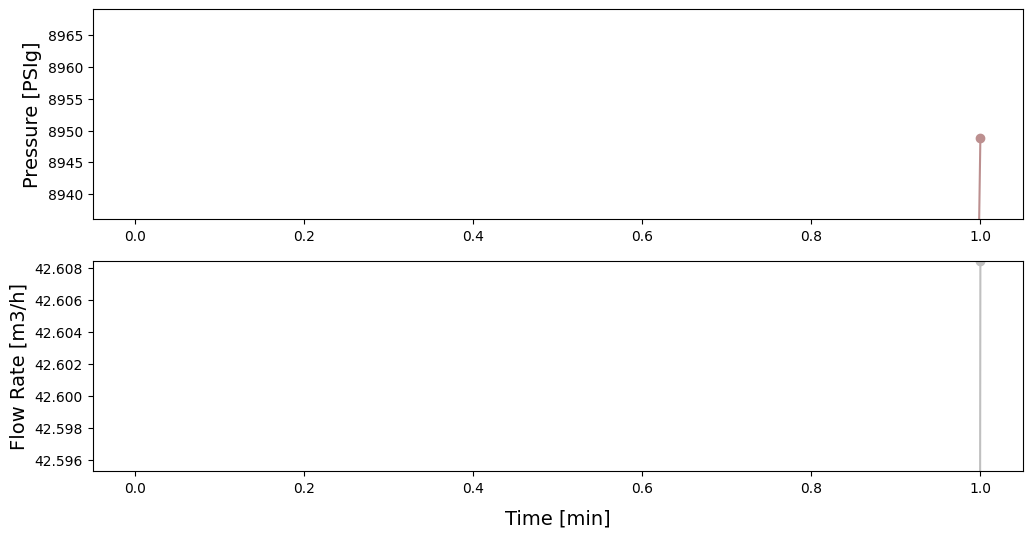

In [33]:
%%time

# define figure size
fig = plt.figure(figsize=(12,6))

# define axis1, labels, and legend
ax1 = fig.add_subplot(211)
ax1.set_ylabel("Pressure [PSIg]", fontsize=14)
# ax1.legend(loc="upper right", fontsize=12, fancybox=True, framealpha=0.5)

# define axis2, labels, and legend
ax2 = fig.add_subplot(212)
ax2.set_xlabel("Time [min]", fontsize=14, labelpad=10)
ax2.set_ylabel("Flow Rate [m3/h]", fontsize=14)
# ax2.legend(loc="upper right", fontsize=12, fancybox=True, framealpha=0.5)

ax1.set_ylim(ch1_min, ch1_max)
ax2.set_ylim(ch2_min, ch2_max)

# TEST 1
test = False
if test:
    dynamic_slide(i=0)
    print (dx, '\n', dy1,'\n', dy2)
    plt.show()

# ANIMATION
animation = True
if animation:
    ani = FuncAnimation(fig, dynamic_slide, interval=speed)


elif not animation:#TODO: no finalizado
    for i in range(len(data)):
        dynamic_slide(1)
        plt.show()


In [53]:
print (iteraciones)

count(980)


# VERSION WIDE WINDOW

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

# load data --> eeg.shape = (224930, 63)
data = pd.read_csv('data/eeg.csv')

# # interactive plotting
%matplotlib qt5
plt.ion()


# velocidad de reproduccion en ms (100ms ojo humano)
speed = 100

# define channels to plot
ch1 = 'Fp2'
ch2 = 'C3'

# initialize deques
start_window = 10

dy1 = [elemento for elemento in data.loc[:start_window, ch1]]
dy2 = [elemento for elemento in data.loc[:start_window, ch2]]
dx = [elemento for elemento in data.loc[:start_window, 'Time']]



# Define figure limits | EJE Y ESTATICO - entre el min y el max de la serie
ch1_min = data[ch1].min()
ch1_max = data[ch1].max()
ch2_min = data[ch2].min()
ch2_max = data[ch2].max()



# Crear generators: debería haber un if para hacer chequeo de dimensiones
gen_dy1 = iter(data.loc[start_window:, ch1].values)
gen_dy2 = iter(data.loc[start_window:, ch2].values)
gen_dx = iter(data.loc[start_window:, 'Time'].values)

In [5]:
def dynamic_window(i):
    global ax1, ax2
    """ Update deques with new values, then update plot"""
    dy1.append(next(gen_dy1))
    dy2.append(next(gen_dy2))
    dx.append(next(gen_dx))

    ax1.cla()
    ax2.cla()

    ax1.set_ylabel("Pressure [PSIg]", fontsize=14)
    ax2.set_xlabel("Time [min]", fontsize=14, labelpad=10)
    ax2.set_ylabel("Flow Rate [m3/h]", fontsize=14)

    ax1.plot(dx, dy1, color='rosybrown', label=ch1)
    ax2.plot(dx, dy2, color='silver', label=ch2)

    ax1.scatter(dx[-1], dy1[-1], color='rosybrown', label=ch1)
    ax2.scatter(dx[-1], dy2[-1], color='silver', label=ch2)

In [6]:
# define figure size
fig = plt.figure(figsize=(12,6))

# define axis1, labels, and legend
ax1 = fig.add_subplot(211)
ax1.set_ylabel("Pressure [PSIg]", fontsize=14)
# ax1.legend(loc="upper right", fontsize=12, fancybox=True, framealpha=0.5)

# define axis2, labels, and legend
ax2 = fig.add_subplot(212)
ax2.set_xlabel("Time [min]", fontsize=14, labelpad=10)
ax2.set_ylabel("Flow Rate [m3/h]", fontsize=14)
# ax2.legend(loc="upper right", fontsize=12, fancybox=True, framealpha=0.5)

# TEST 1
test = False
if test:
    dynamic_window(i=0)
    plt.show()

# ANIMATION
animation = True
if animation:
    ani = FuncAnimation(fig, dynamic_window, interval=speed)



In [4]:
import sys

In [5]:
sys.exit(0)

SystemExit: 0

c:\Users\aguST\Classgap\7_Willy\my_project\venv\lib\site-packages\IPython\core\interactiveshell.py:3468: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


In [6]:
data

,Time,Fp2,C3
0,1.000000,8948.864258,42.608395
1,1.016667,8948.469727,42.608349
2,1.033333,8946.292969,42.608303
3,1.050000,8944.116211,42.608257
4,1.066667,8941.939453,42.608208
...,...,...,...
282,5.700000,8959.234375,42.595455
283,5.716667,8958.985352,42.595409
284,5.733333,8958.735352,42.595364
285,5.750000,8958.486328,42.595318


In [41]:
# ALTERNATIVA
import numpy as np
import pandas as pd
from collections import deque

# TESTING TOOLS
from itertools import count
iteraciones = count(1)


data = pd.read_csv('data/eeg.csv')



# define channels to plot
ch1 = 'Fp2'
ch2 = 'C3'

# initialize deques
slide_window = 10
dy1 = deque(np.zeros(slide_window), slide_window)
dy2 = deque(np.zeros(slide_window), slide_window)
dx = deque(np.zeros(slide_window), slide_window)




# Crear generators: debería haber un if para hacer chequeo de dimensiones
gen_dy1 = iter(data[ch1].values)
gen_dy2 = iter(data[ch2].values)
gen_dx = iter(data['Time'].values)

def dynamic_slide_test(i):
    global ax1, ax2
    """ Update deques with new values, then update plot"""
    next(iteraciones)
    dy1.append(next(gen_dy1))
    dy2.append(next(gen_dy2))
    dx.append(next(gen_dx))






In [42]:
trigger = 0

while True:
    dynamic_slide_test(i=0)

    print (dx, '\n', dy1,'\n', dy2)

    trigger += 1
    if trigger == 1000:
        break

deque([0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0], maxlen=10) 
 deque([0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 8948.864258], maxlen=10) 
 deque([0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 42.60839462], maxlen=10)
deque([0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.016666667], maxlen=10) 
 deque([0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 8948.864258, 8948.469727], maxlen=10) 
 deque([0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 42.60839462, 42.60834885], maxlen=10)
deque([0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.016666667, 1.033333333], maxlen=10) 
 deque([0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 8948.864258, 8948.469727, 8946.292969], maxlen=10) 
 deque([0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 42.60839462, 42.60834885, 42.60830307], maxlen=10)
deque([0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.016666667, 1.033333333, 1.05], maxlen=10) 
 deque([0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 8948.864258, 8948.469727, 8946.292969, 8944.116211], maxlen=10) 
 deque([0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 42.60839462, 42.608

StopIteration: 

In [43]:
print (iteraciones)

count(289)
